In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pre-processing and creating new dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# File paths
f_edges = '/content/drive/MyDrive/Twitch_Dataset/twitch_egos_A.txt'
f_graph_ids = '/content/drive/MyDrive/Twitch_Dataset/twitch_egos_graph_indicator.txt'
f_graph_labels = '/content/drive/MyDrive/Twitch_Dataset/twitch_egos_graph_labels.txt'

Mounted at /content/drive


In [ ]:
graph_edges = pd.read_csv(f_edges, header=None, sep=' ')
graph_edges

,0,1
0,"36,",1
1,"1,",36
2,"36,",2
3,"2,",36
4,"36,",3
...,...,...
22011029,"3771076,",3771079
22011030,"3771078,",3771077
22011031,"3771077,",3771078
22011032,"3771079,",3771078


In [ ]:
# clean dataframe to remove commas 
graph_edges[0] = graph_edges[0].apply(lambda x: int(x.strip(",")))
graph_edges

,0,1
0,36,1
1,1,36
2,36,2
3,2,36
4,36,3
...,...,...
22011029,3771076,3771079
22011030,3771078,3771077
22011031,3771077,3771078
22011032,3771079,3771078


In [ ]:
graph_edges.values

array([[     36,       1],
       [      1,      36],
       [     36,       2],
       ...,
       [3771077, 3771078],
       [3771079, 3771078],
       [3771078, 3771079]])

In [ ]:
graph_ids = pd.read_csv(f_graph_ids, header=None)
graph_ids

,0
0,1
1,1
2,1
3,1
4,1
...,...
3771076,127094
3771077,127094
3771078,127094
3771079,127094


In [ ]:
#add nodes
ids_list = [[key,len(values)] for key,values in graph_ids.groupby(0).groups.items()]

In [ ]:
ids_list

[[1, 36],
 [2, 41],
 [3, 32],
 [4, 38],
 [5, 22],
 [6, 40],
 [7, 26],
 [8, 16],
 [9, 19],
 [10, 39],
 [11, 43],
 [12, 21],
 [13, 14],
 [14, 24],
 [15, 42],
 [16, 35],
 [17, 37],
 [18, 29],
 [19, 21],
 [20, 20],
 [21, 18],
 [22, 34],
 [23, 49],
 [24, 42],
 [25, 24],
 [26, 15],
 [27, 27],
 [28, 51],
 [29, 52],
 [30, 20],
 [31, 48],
 [32, 15],
 [33, 17],
 [34, 44],
 [35, 40],
 [36, 50],
 [37, 30],
 [38, 17],
 [39, 34],
 [40, 24],
 [41, 16],
 [42, 26],
 [43, 19],
 [44, 18],
 [45, 17],
 [46, 51],
 [47, 14],
 [48, 44],
 [49, 15],
 [50, 25],
 [51, 51],
 [52, 28],
 [53, 24],
 [54, 14],
 [55, 28],
 [56, 32],
 [57, 37],
 [58, 43],
 [59, 51],
 [60, 15],
 [61, 32],
 [62, 35],
 [63, 32],
 [64, 17],
 [65, 30],
 [66, 22],
 [67, 35],
 [68, 25],
 [69, 38],
 [70, 47],
 [71, 50],
 [72, 35],
 [73, 44],
 [74, 30],
 [75, 31],
 [76, 28],
 [77, 24],
 [78, 33],
 [79, 28],
 [80, 28],
 [81, 19],
 [82, 31],
 [83, 20],
 [84, 41],
 [85, 48],
 [86, 28],
 [87, 34],
 [88, 22],
 [89, 25],
 [90, 37],
 [91, 16],
 [92, 26

In [ ]:
# create graph IDs and node IDs
node_id = 1
id_nodes = []
for graph_id, num_nodes in ids_list:
  nodes = []
  for i in range(num_nodes):
    nodes.append(node_id)
    node_id += 1
  id_nodes.append([graph_id, nodes])

In [ ]:
# add ids and nodes to new dataframe
f_output = pd.DataFrame(id_nodes, columns=["GraphID", "Nodes"])
f_output

,GraphID,Nodes
0,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,2,"[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4..."
2,3,"[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 8..."
3,4,"[110, 111, 112, 113, 114, 115, 116, 117, 118, ..."
4,5,"[148, 149, 150, 151, 152, 153, 154, 155, 156, ..."
...,...,...
127089,127090,"[3770922, 3770923, 3770924, 3770925, 3770926, ..."
127090,127091,"[3770962, 3770963, 3770964, 3770965, 3770966, ..."
127091,127092,"[3770997, 3770998, 3770999, 3771000, 3771001, ..."
127092,127093,"[3771038, 3771039, 3771040, 3771041, 3771042, ..."


In [ ]:
total_graphs = len(ids_list)
total_graphs

127094

In [ ]:
# update edges and node ids to start from 0 for each graph
total_new_nodes = []
total_new_edges = []
for row in f_output.itertuples():
  new_nodes = []
  new_edges = []
  min_node = min(row[2])

  for node in row[2]:
    new_nodes.append(node - min_node)
  
  for edge1, edge2 in row[3]:
    new_edges.append([edge1-min_node, edge2-min_node])

  total_new_nodes.append(new_nodes)
  total_new_edges.append(new_edges)


In [ ]:
# save all columns into a new dataframe
new_output = pd.DataFrame(f_output['GraphID'].copy())
new_output["Nodes"] = total_new_nodes
new_output["Edges"] = total_new_edges
new_output

,GraphID,Nodes,Edges
0,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[35, 0], [0, 35], [35, 1], [1, 35], [35, 2], ..."
1,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[40, 0], [0, 40], [40, 1], [1, 40], [40, 2], ..."
2,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[31, 0], [0, 31], [31, 1], [1, 31], [31, 2], ..."
3,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[37, 0], [0, 37], [37, 1], [1, 37], [37, 2], ..."
4,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[21, 0], [0, 21], [21, 1], [1, 21], [21, 2], ..."
...,...,...,...
127089,127090,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[39, 0], [0, 39], [39, 1], [1, 39], [39, 2], ..."
127090,127091,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[34, 0], [0, 34], [34, 1], [1, 34], [34, 2], ..."
127091,127092,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[40, 0], [0, 40], [40, 1], [1, 40], [40, 2], ..."
127092,127093,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[18, 0], [0, 18], [18, 1], [1, 18], [18, 2], ..."


In [ ]:
# save dataframe to csv
new_output.to_csv('/content/drive/MyDrive/Twitch_Dataset/new_graphs_dataset.csv')

## Visualization of graphs

In [ ]:
def createGraph(graph_id, color, index):
  # Create graph
  G = nx.Graph()

  graph_data = new_output.loc[new_output['GraphID'] == graph_id]

  G.add_edges_from(list(graph_data.Edges)[0])
  print(nx.density(G))

  # Create graph visualization
  pos = nx.spring_layout(G, seed=42)

  plt.figure(figsize=(12, 8))

  nx.draw(G, pos, with_labels=True, node_size=400, node_color=color, font_size=7, alpha=0.8)

  plt.title('Twitch Ego Net with Label '+str(index), fontsize=16)
  plt.axis('off')
  plt.show()


0.09682539682539683


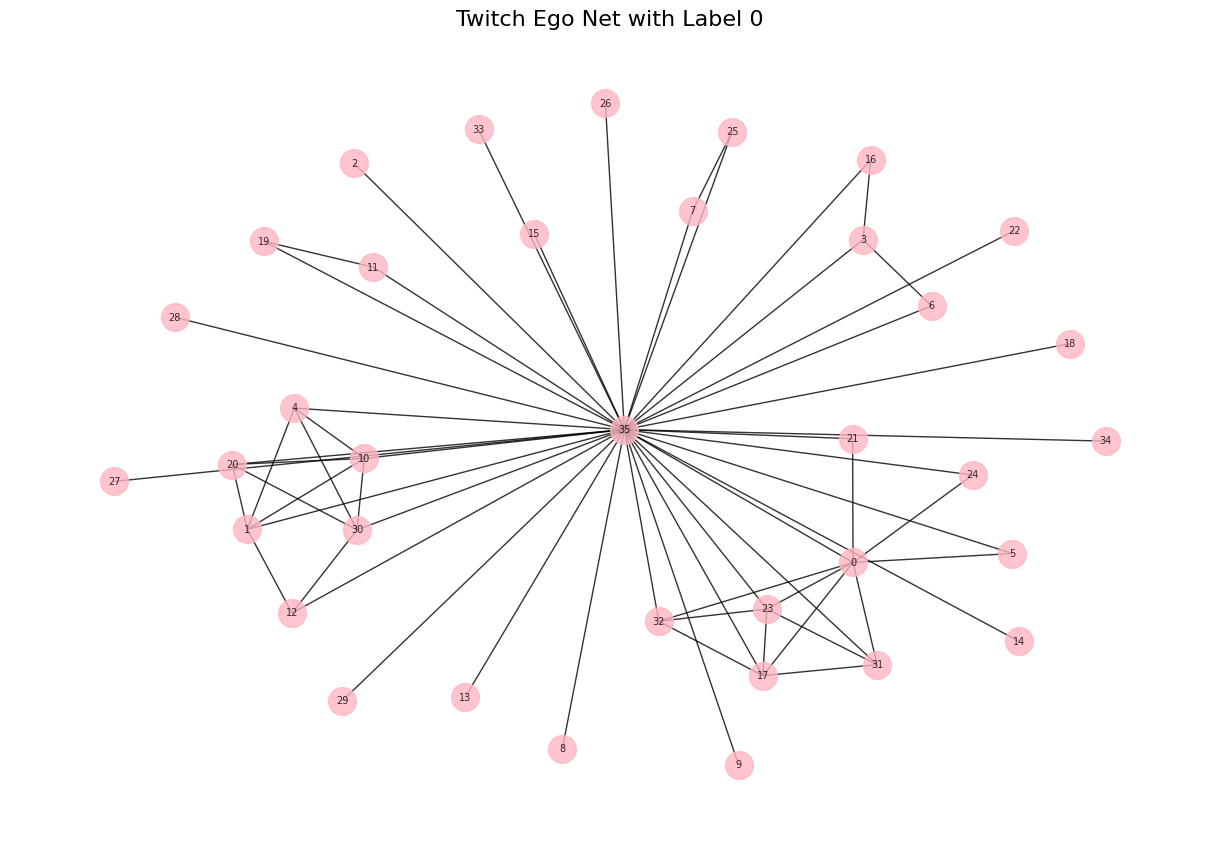

In [ ]:
createGraph(1, "lightpink", 0)

0.20625889046941678


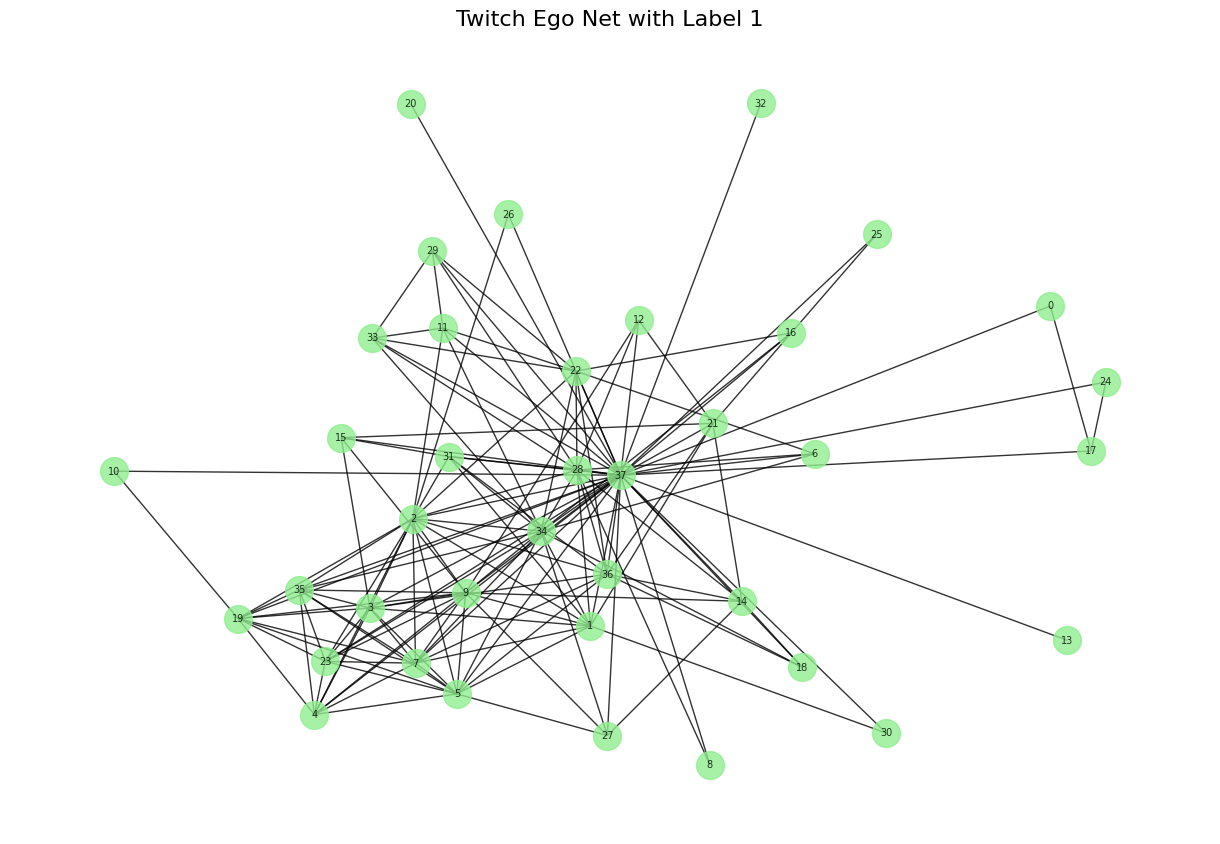

In [ ]:
createGraph(4, "lightgreen", 1)